In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
#!pip install -U scikit-learn scipy matplotlib
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [5]:
df = pd.read_excel('/Users/yiyanshi/Desktop/IBM Data Science/Capstone/Berlin Stadtteil.xlsx')

In [34]:
df

,Borough,Population,Area,Density,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,52.507856,13.263952
1,Friedrichshain-Kreuzberg,268225,20.16,13187,52.506862,13.450642
2,Lichtenberg,259881,52.29,4952,48.921296,7.481227
3,Marzahn-Hellersdorf,248264,61.74,4046,52.522523,13.587663
4,Mitte,332919,39.47,8272,52.517690,13.402376
5,Neukölln,310283,44.93,6804,52.481150,13.435350
6,Pankow,366441,103.01,3476,52.597917,13.435316
7,Reinickendorf,240454,89.46,2712,52.604763,13.295287
8,Spandau,223962,91.91,2441,52.535788,13.197792
9,Steglitz-Zehlendorf,293989,102.50,2818,52.429205,13.229974


# Part2: Add Geo data to df from Foursquare:
## require geopy.geocoder

In [7]:
locator = Nominatim(user_agent = "geo_berlin")
df['Major_dist_Coord'] = df['Borough'].apply(locator.geocode).apply(lambda x:(x.latitude, x.longitude))
df[['Latitude','Longitude']] = df['Major_dist_Coord'].apply(pd.Series)
df.drop(['Major_dist_Coord'], axis = 1, inplace = True)
df

,Borough,Population,Area,Density,Latitude,Longitude
0,Charlottenburg-Wilmersdorf,319628,64.72,4878,52.507856,13.263952
1,Friedrichshain-Kreuzberg,268225,20.16,13187,52.506862,13.450642
2,Lichtenberg,259881,52.29,4952,48.921296,7.481227
3,Marzahn-Hellersdorf,248264,61.74,4046,52.522523,13.587663
4,Mitte,332919,39.47,8272,52.517690,13.402376
5,Neukölln,310283,44.93,6804,52.481150,13.435350
6,Pankow,366441,103.01,3476,52.597917,13.435316
7,Reinickendorf,240454,89.46,2712,52.604763,13.295287
8,Spandau,223962,91.91,2441,52.535788,13.197792
9,Steglitz-Zehlendorf,293989,102.50,2818,52.429205,13.229974


# Part3: Neighborhoods Clustering in Berlin City

In [10]:
address = 'Berlin'

locator_berlin = Nominatim(user_agent = "geo_berlin")
location = locator_berlin.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geo coordinate of Berlin city are: {}, {}'.format(latitude,longitude))

The geo coordinate of Berlin city are: 52.5015217, 13.4025498


## Visualization of Berlin's neighborhoods:

In [16]:
map_berlin = folium.Map(location=[latitude,longitude],zoom_start = 10)

for lat,lng,lab in zip(df['Latitude'],df['Longitude'],df['Borough']):
    lab = folium.Popup(lab, parse_html = True)
    folium.CircleMarker([lat,lng], radius =5 , popup = lab, color = 'green', fill = True,
                       fill_color = '#3186cc', fill_opacity = 0.7, parse_html = False).add_to(map_berlin)
map_berlin

## 4Square API for exploration the neighborhood of Berlin:

In [17]:
CLIENT_ID = 'RO03BKKXG21OD0YE4Q5J4D31ZYUC5YVGAUCUXRLBV3RLQEIN'
CLIENT_SECRET = '1MAIIHS3KOLS0IPKSGM0TRIE11UZWSO2H1N1HE2E3ZB5YMWH'
VERSION = '20201105'

## Show the top 20 venues in berlin-Mitte with radius = 800m

In [20]:
neighbor_lat = df.loc[4, 'Latitude']
neighbor_lng = df.loc[4, 'Longitude']
neigh_name = df.loc[4, 'Borough']
print('Borough name: Berlin - {}, Latitude: {}, Longitude:{}'.format(neigh_name, neighbor_lat, neighbor_lng))

Borough name: Berlin - Mitte, Latitude: 52.5176896, Longitude:13.4023757


In [22]:
LIM = 20 # Set the number of top 20 Venues
radius = 800

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbor_lat, 
    neighbor_lng, 
    radius, 
    LIM)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RO03BKKXG21OD0YE4Q5J4D31ZYUC5YVGAUCUXRLBV3RLQEIN&client_secret=1MAIIHS3KOLS0IPKSGM0TRIE11UZWSO2H1N1HE2E3ZB5YMWH&v=20201105&ll=52.5176896,13.4023757&radius=800&limit=20'

## Process the data from 4Square returned:

In [25]:
results = requests.get(url).json()

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [27]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-27-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Lustgarten,Garden,52.518469,13.399454
1,Kuppelumgang Berliner Dom,Scenic Lookout,52.518966,13.400981
2,Radisson Blu,Hotel,52.519561,13.402857
3,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",Outdoor Sculpture,52.516290,13.405558
4,Designpanoptikum - surreales Museum für indust...,Museum,52.516941,13.406072


In [28]:
print('{} Venues were returned by 4Square'.format(nearby_venues.shape[0]))

20 Venues were returned by 4Square


In [29]:
print('{} Unique categories in Berlin - Mitte'.format(nearby_venues['categories'].value_counts().shape[0]))

16 Unique categories in Berlin - Mitte


In [33]:
print(nearby_venues['categories'].value_counts()[:])

History Museum       4
Art Gallery          2
Hotel                1
Outdoor Sculpture    1
Theater              1
Museum               1
Historic Site        1
Concert Hall         1
Scenic Lookout       1
Neighborhood         1
Cupcake Shop         1
Art Museum           1
Plaza                1
Garden               1
Café                 1
Bookstore            1
Name: categories, dtype: int64


In [43]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [46]:
Berlin_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Charlottenburg-Wilmersdorf
Friedrichshain-Kreuzberg
Lichtenberg
Marzahn-Hellersdorf
Mitte
Neukölln
Pankow
Reinickendorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schöneberg
Treptow-Köpenick


In [59]:
Berlin_venues.shape

(947, 7)

In [60]:
Berlin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Die Wühlmäuse,52.508830,13.270733,Comedy Club
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Adik's Stehcafe,52.507889,13.258131,Café
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Drachenberg,52.502594,13.249834,Mountain
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Café K,52.509789,13.255227,Café


## create a DF the concentrate  Berlin:

In [61]:
print(Berlin_venues['Venue Category'].value_counts())

Supermarket                      73
Café                             45
Italian Restaurant               45
Park                             29
Drugstore                        29
Coffee Shop                      27
German Restaurant                22
Bar                              20
Hotel                            19
Ice Cream Shop                   19
Bakery                           19
Pizza Place                      13
Restaurant                       13
Cocktail Bar                     13
Garden                           13
Gym / Fitness Center             13
Greek Restaurant                 11
Bus Stop                         11
Fast Food Restaurant             10
Organic Grocery                  10
Falafel Restaurant               10
Bookstore                         9
Trattoria/Osteria                 9
Thai Restaurant                   8
Vietnamese Restaurant             8
Asian Restaurant                  8
Indie Movie Theater               8
Vegetarian / Vegan Restauran

In [62]:
print('There are {} unique categories in Berlin.'.format(len(Berlin_venues['Venue Category'].unique())))

There are 213 unique categories in Berlin.


## Next, create a dataframe of top 15 categories in Berlin:

In [67]:
berlin_top15 = Berlin_venues['Venue Category'].value_counts()[0:15].to_frame(name = 'top15_cat')
berlin_top15 = berlin_top15.reset_index()
berlin_top15.rename(index = str, columns = {"index": "Venue_category", "top15_cat":"Frequency"}, inplace = True)
berlin_top15

,Venue_category,Frequency
0,Supermarket,73
1,Café,45
2,Italian Restaurant,45
3,Park,29
4,Drugstore,29
5,Coffee Shop,27
6,German Restaurant,22
7,Bar,20
8,Hotel,19
9,Ice Cream Shop,19


## Plot the top15 cat:

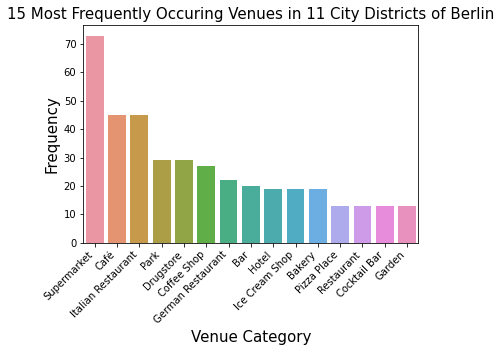

<Figure size 1296x504 with 0 Axes>

In [70]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_category", y="Frequency", data=berlin_top15)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('15 Most Frequently Occuring Venues in 11 City Districts of Berlin', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [135]:
Berlin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Die Wühlmäuse,52.508830,13.270733,Comedy Club
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Adik's Stehcafe,52.507889,13.258131,Café
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Drachenberg,52.502594,13.249834,Mountain
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Café K,52.509789,13.255227,Café


In [170]:
number_temp = Berlin_venues.groupby(['Neighborhood'])['Venue Category'].count() # only the first 100 will be displayed
berlin_plot_temp_df = number_temp.to_frame()
berlin_plot_temp_df.reset_index()

,Neighborhood,Venue Category
0,Charlottenburg-Wilmersdorf,100
1,Friedrichshain-Kreuzberg,100
2,Lichtenberg,2
3,Marzahn-Hellersdorf,86
4,Mitte,100
5,Neukölln,100
6,Pankow,47
7,Reinickendorf,100
8,Spandau,79
9,Steglitz-Zehlendorf,100


In [173]:
list_rest_no = berlin_plot_temp_df['Venue Category'].to_list()
list_dist = df['Borough'].to_list()

In [175]:
print(list_rest_no)
print(list_dist)

[100, 100, 2, 86, 100, 100, 47, 100, 79, 100, 100, 33]
['Charlottenburg-Wilmersdorf', 'Friedrichshain-Kreuzberg', 'Lichtenberg', 'Marzahn-Hellersdorf', 'Mitte', 'Neukölln', 'Pankow', 'Reinickendorf', 'Spandau', 'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Treptow-Köpenick']


In [168]:
berlin_plot_temp_df

,Venue Category
Neighborhood,
Charlottenburg-Wilmersdorf,100
Friedrichshain-Kreuzberg,100
Lichtenberg,2
Marzahn-Hellersdorf,86
Mitte,100
Neukölln,100
Pankow,47
Reinickendorf,100
Spandau,79


In [154]:
number_temp

Neighborhood
Charlottenburg-Wilmersdorf    100
Friedrichshain-Kreuzberg      100
Lichtenberg                     2
Marzahn-Hellersdorf            86
Mitte                         100
Neukölln                      100
Pankow                         47
Reinickendorf                 100
Spandau                        79
Steglitz-Zehlendorf           100
Tempelhof-Schöneberg          100
Treptow-Köpenick               33
Name: Venue Category, dtype: int64

In [77]:
#one hot encoding
berlin_onehot = pd.get_dummies(Berlin_venues[['Venue Category']], prefix="", prefix_sep="")
berlin_onehot['Neighborhoods'] = Berlin_venues['Neighborhood']
# set column[neighborhoods] as the first column:
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot1 = berlin_onehot[fixed_columns]

berlin_onehot1.head()

,Neighborhoods,ATM,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bathing Area,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat Rental,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Canal,Candy Store,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Cosmetics Shop,Creperie,Currywurst Joint,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doner Restaurant,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kumpir Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Nature Preserve,Neighborhood,Nightclub,Noodle House,Opera House,Organic Grocery,Outdoor Sculpture,Paintball Field,Palace,Palatine Restaurant,Park,Pastry Shop,Pet Café,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Plaza,Poke Place,Pool,Pool Hall,Post Office,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rest Area,Restaurant,River,Rock Club,Roof Deck,Rooftop Bar,Sandwich Place,Scenic Lookout,Schnitzel Restaurant,Seafood Restaurant,Shipping Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Trail,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Yoga Studio
0,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Charlottenburg-Wilmersdorf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [78]:
berlin_onehot1.shape

(947, 214)

## Grouping the data by neighborhoods and showing the mean of the frequency of occurrence for each category of venues:

In [80]:
berlin_grouped = berlin_onehot1.groupby('Neighborhoods').mean().reset_index()
berlin_grouped

,Neighborhoods,ATM,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bathing Area,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat Rental,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Stop,Business Service,Butcher,Cable Car,Café,Canal,Candy Store,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Cosmetics Shop,Creperie,Currywurst Joint,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Doner Restaurant,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Forest,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kumpir Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Nature Preserve,Neighborhood,Nightclub,Noodle House,Opera House,Organic Grocery,Outdoor Sculpture,Paintball Field,Palace,Palatine Restaurant,Park,Pastry Shop,Pet Café,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Plaza,Poke Place,Pool,Pool Hall,Post Office,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rest Area,Restaurant,River,Rock Club,Roof Deck,Rooftop Bar,Sandwich Place,Scenic Lookout,Schnitzel Restaurant,Seafood Restaurant,Shipping Store,Shopping Mall,Skating Rink,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Trail,Tram Station,Trattoria/Osteria,Tree,Turkish Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Waterfront,Whisky Bar,Windmill,Wine Bar,Wine Shop,Yoga Studio
0,Charlottenburg-Wilmersdorf,0.000000,0.00,0.00,0.000000,0.01,0.010000,0.00,0.03,0.00,0.020000,0.010000,0.00,0.00,0.020000,0.000000,0.020000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.00,0.01,0.010000,0.000000,0.000000,0.01,0.000000,0.090000,0.00,0.00,0.000000,0.00,0.00,0.010000,0.00,0.00,0.000000,0.00,0.010000,0.00,0.01,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.010000,0.000000,0.00,0.010000,0.00,0.00,0.000000,0.00,0.00,0.01,0.00,0.000000,0.01,0.00,0.000000,0.01,0.00,0.000000,0.000000,0.01,0.010000,0.000000,0.010000,0.00,0.000000,0.000000,0.00,0.050000,0.000000,0.000000,0.02,0.010000,0.010000,0.000000,0.030000,0.000000,0.000000,0.010000,0.000000,0.00,0.00,0.00,0.040000,0.00,0.020000,0.01,0.00,0.00,0.090000,0.01,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.02,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.020000,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.020000,0.00,0.000000,0.010000,0.00,0.020000,0.00,0.01,0.000000,0.010000,0.000000,0.000000,0.010000,0.00,0.000000,0.010000,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0

In [82]:
berlin_grouped.shape

(12, 214)

## show the neighborhoods with their top 15 most common venues:

In [86]:
num_top_venues = 15

for hood in berlin_grouped['Neighborhoods']:
    print("----{}----".format(hood))
    temp = berlin_grouped[berlin_grouped['Neighborhoods'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Charlottenburg-Wilmersdorf----
                    venue  freq
0                    Café  0.09
1      Italian Restaurant  0.09
2       German Restaurant  0.05
3       Trattoria/Osteria  0.04
4                   Hotel  0.04
5             Supermarket  0.03
6              Art Museum  0.03
7          Soccer Stadium  0.03
8    Gym / Fitness Center  0.03
9   Vietnamese Restaurant  0.03
10                 Bakery  0.02
11           Gourmet Shop  0.02
12                    Bar  0.02
13         Ice Cream Shop  0.02
14                   Park  0.02


----Friedrichshain-Kreuzberg----
                            venue  freq
0                     Coffee Shop  0.06
1              Falafel Restaurant  0.06
2                             Bar  0.05
3                            Café  0.05
4                  Ice Cream Shop  0.04
5                    Cocktail Bar  0.04
6                 Thai Restaurant  0.03
7                     Pizza Place  0.03
8              Italian Restaurant  0.03
9                 

## create a pd DataFrame to show the top 15:

In [87]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [115]:
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhoods']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Charlottenburg-Wilmersdorf,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
1,Friedrichshain-Kreuzberg,Falafel Restaurant,Coffee Shop,Bar,Café,Ice Cream Shop,Cocktail Bar,Brewery,Italian Restaurant,Pizza Place,Nightclub,Thai Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Record Shop,Burger Joint
2,Lichtenberg,Hostel,Historic Site,Yoga Studio,Drugstore,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Discount Store
3,Marzahn-Hellersdorf,Supermarket,Garden,Drugstore,Shopping Mall,Big Box Store,Park,Fast Food Restaurant,Tram Station,Bakery,Ice Cream Shop,Café,Gym / Fitness Center,Scenic Lookout,Greek Restaurant,Italian Restaurant
4,Mitte,Coffee Shop,Bookstore,Café,Hotel,Park,Beer Bar,Sandwich Place,Italian Restaurant,Monument / Landmark,Middle Eastern Restaurant,Concert Hall,Theater,Bakery,Modern European Restaurant,Cocktail Bar


## Clustering the neighborhoods with k-means:

In [94]:
# set number of clusters (I choose 5)
kclusters = 5

berlin_grouped1 = berlin_grouped.drop('Neighborhoods', 1, inplace = False)
berlin_cluster = berlin_grouped1

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_cluster)

# check cluster labels generated for each row in the dataframe

In [95]:
kmeans.labels_[0:16]

array([3, 2, 1, 0, 2, 2, 0, 3, 3, 3, 3, 4], dtype=int32)

## Add Cluster labels:

In [116]:
berlin_cluster_labeled = neighborhoods_venues_sorted
berlin_cluster_labeled.insert(0,'Berlin Cluster Labels', kmeans.labels_)

In [117]:
berlin_cluster_labeled

,Berlin Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,3,Charlottenburg-Wilmersdorf,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
1,2,Friedrichshain-Kreuzberg,Falafel Restaurant,Coffee Shop,Bar,Café,Ice Cream Shop,Cocktail Bar,Brewery,Italian Restaurant,Pizza Place,Nightclub,Thai Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Record Shop,Burger Joint
2,1,Lichtenberg,Hostel,Historic Site,Yoga Studio,Drugstore,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Discount Store
3,0,Marzahn-Hellersdorf,Supermarket,Garden,Drugstore,Shopping Mall,Big Box Store,Park,Fast Food Restaurant,Tram Station,Bakery,Ice Cream Shop,Café,Gym / Fitness Center,Scenic Lookout,Greek Restaurant,Italian Restaurant
4,2,Mitte,Coffee Shop,Bookstore,Café,Hotel,Park,Beer Bar,Sandwich Place,Italian Restaurant,Monument / Landmark,Middle Eastern Restaurant,Concert Hall,Theater,Bakery,Modern European Restaurant,Cocktail Bar
5,2,Neukölln,Coffee Shop,Bar,Café,Cocktail Bar,Vegetarian / Vegan Restaurant,Italian Restaurant,Indie Movie Theater,Ice Cream Shop,African Restaurant,Pizza Place,Bistro,Plaza,Park,Vietnamese Restaurant,Restaurant
6,0,Pankow,Supermarket,Italian Restaurant,Bus Stop,Park,Greek Restaurant,Hotel,Drugstore,Café,Tram Station,Bakery,ATM,Light Rail Station,Discount Store,Restaurant,Organic Grocery
7,3,Reinickendorf,Supermarket,Italian Restaurant,Drugstore,German Restaurant,Restaurant,Clothing Store,Indian Restaurant,Fast Food Restaurant,Motorcycle Shop,Café,Shopping Mall,Seafood Restaurant,Sandwich Place,Organic Grocery,Park
8,3,Spandau,Supermarket,Bus Stop,Drugstore,German Restaurant,Pizza Place,Park,Ice Cream Shop,Trattoria/Osteria,Restaurant,Big Box Store,Bakery,Fast Food Restaurant,Argentinian Restaurant,Gym / Fitness Center,Furniture / Home Store
9,3,Steglitz-Zehlendorf,Café,Italian Restaurant,Supermarket,German Restaurant,Drugstore,Gas Station,Organic Grocery,Park,Doner Restaurant,Hotel,Liquor Store,Steakhouse,Bus Stop,Asian Restaurant,Bagel Shop


## Creat the master dataframe for plot map:

In [122]:
## Add cluster and create the master dataframe called Berlin_master.
Berlin_master = Berlin_venues.rename(columns = {'Borough':'Neighborhood'}, inplace = False)
Berlin_master = Berlin_master.join(berlin_cluster_labeled.set_index('Neighborhood'), on = 'Neighborhood')

In [126]:
Berlin_master

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Berlin Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Die Wühlmäuse,52.508830,13.270733,Comedy Club,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Adik's Stehcafe,52.507889,13.258131,Café,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Drachenberg,52.502594,13.249834,Mountain,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Café K,52.509789,13.255227,Café,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
5,Charlottenburg-Wilmersdorf,52.507856,13.263952,Block House,52.509393,13.270958,Steakhouse,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
6,Charlottenburg-Wilmersdorf,52.507856,13.263952,rbb Dachlounge,52.508575,13.274778,Rooftop Bar,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
7,Charlottenburg-Wilmersdorf,52.507856,13.263952,Westend Klause,52.516494,13.260109,Bar,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
8,Charlottenburg-Wilmersdorf,52.507856,13.263952,Lietzenseepark,52.505199,13.286676,Park,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
9,Charlottenburg-Wilmersdorf,52.507856,13.263952,Hotel Villa Kastania,52.510310,13.268223,Hotel,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery


## Visual with 4Square:

In [178]:
# create a map with folium
map_berlin_cluster = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Berlin_master['Venue Latitude'], 
                                  Berlin_master['Venue Longitude'], 
                                  Berlin_master['Neighborhood'], 
                                  Berlin_master['Berlin Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.2,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_berlin_cluster)
       
map_berlin_cluster

In [184]:
from folium.plugins import HeatMap

In [194]:
num_temp = Berlin_master.shape[0]
lat2 = np.array(Berlin_master['Venue Latitude'])
lng2 = np.array(Berlin_master['Venue Longitude'])
plot_loc2 = np.array(Berlin_master['Berlin Cluster Labels'])  
data1 = [[lat2[i], lng2[i],plot_loc2[i]] for i in range(num_temp)]

Berlin_heatmap = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

show_heatmap = HeatMap(data1).add_to(Berlin_heatmap)

In [195]:
Berlin_heatmap

# Explain the Clusters:

In [180]:
Berlin_master.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Berlin Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Charlottenburg-Wilmersdorf,52.507856,13.263952,Die Wühlmäuse,52.508830,13.270733,Comedy Club,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
1,Charlottenburg-Wilmersdorf,52.507856,13.263952,Rasas,52.512100,13.264464,Indian Restaurant,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
2,Charlottenburg-Wilmersdorf,52.507856,13.263952,Adik's Stehcafe,52.507889,13.258131,Café,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
3,Charlottenburg-Wilmersdorf,52.507856,13.263952,Drachenberg,52.502594,13.249834,Mountain,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
4,Charlottenburg-Wilmersdorf,52.507856,13.263952,Café K,52.509789,13.255227,Café,3,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery


## Cluster 0:

In [196]:
berlin_cluster_labeled.loc[berlin_cluster_labeled['Berlin Cluster Labels'] == 0, berlin_cluster_labeled.columns[[1] + list(range(0, berlin_cluster_labeled.shape[1]))]]

,Neighborhood,Berlin Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,Marzahn-Hellersdorf,0,Marzahn-Hellersdorf,Supermarket,Garden,Drugstore,Shopping Mall,Big Box Store,Park,Fast Food Restaurant,Tram Station,Bakery,Ice Cream Shop,Café,Gym / Fitness Center,Scenic Lookout,Greek Restaurant,Italian Restaurant
6,Pankow,0,Pankow,Supermarket,Italian Restaurant,Bus Stop,Park,Greek Restaurant,Hotel,Drugstore,Café,Tram Station,Bakery,ATM,Light Rail Station,Discount Store,Restaurant,Organic Grocery


## Cluster 1:

In [197]:
berlin_cluster_labeled.loc[berlin_cluster_labeled['Berlin Cluster Labels'] == 1, berlin_cluster_labeled.columns[[1] + list(range(0, berlin_cluster_labeled.shape[1]))]]

,Neighborhood,Berlin Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
2,Lichtenberg,1,Lichtenberg,Hostel,Historic Site,Yoga Studio,Drugstore,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Discount Store


## Cluster 2:

In [198]:
berlin_cluster_labeled.loc[berlin_cluster_labeled['Berlin Cluster Labels'] == 2, berlin_cluster_labeled.columns[[1] + list(range(0, berlin_cluster_labeled.shape[1]))]]

,Neighborhood,Berlin Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
1,Friedrichshain-Kreuzberg,2,Friedrichshain-Kreuzberg,Falafel Restaurant,Coffee Shop,Bar,Café,Ice Cream Shop,Cocktail Bar,Brewery,Italian Restaurant,Pizza Place,Nightclub,Thai Restaurant,Vegetarian / Vegan Restaurant,Middle Eastern Restaurant,Record Shop,Burger Joint
4,Mitte,2,Mitte,Coffee Shop,Bookstore,Café,Hotel,Park,Beer Bar,Sandwich Place,Italian Restaurant,Monument / Landmark,Middle Eastern Restaurant,Concert Hall,Theater,Bakery,Modern European Restaurant,Cocktail Bar
5,Neukölln,2,Neukölln,Coffee Shop,Bar,Café,Cocktail Bar,Vegetarian / Vegan Restaurant,Italian Restaurant,Indie Movie Theater,Ice Cream Shop,African Restaurant,Pizza Place,Bistro,Plaza,Park,Vietnamese Restaurant,Restaurant


## Cluster 3:

In [199]:
berlin_cluster_labeled.loc[berlin_cluster_labeled['Berlin Cluster Labels'] == 3, berlin_cluster_labeled.columns[[1] + list(range(0, berlin_cluster_labeled.shape[1]))]]

,Neighborhood,Berlin Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Charlottenburg-Wilmersdorf,3,Charlottenburg-Wilmersdorf,Italian Restaurant,Café,German Restaurant,Hotel,Trattoria/Osteria,Gym / Fitness Center,Vietnamese Restaurant,Art Museum,Soccer Stadium,Supermarket,Ice Cream Shop,Bar,Lounge,Mountain,Organic Grocery
7,Reinickendorf,3,Reinickendorf,Supermarket,Italian Restaurant,Drugstore,German Restaurant,Restaurant,Clothing Store,Indian Restaurant,Fast Food Restaurant,Motorcycle Shop,Café,Shopping Mall,Seafood Restaurant,Sandwich Place,Organic Grocery,Park
8,Spandau,3,Spandau,Supermarket,Bus Stop,Drugstore,German Restaurant,Pizza Place,Park,Ice Cream Shop,Trattoria/Osteria,Restaurant,Big Box Store,Bakery,Fast Food Restaurant,Argentinian Restaurant,Gym / Fitness Center,Furniture / Home Store
9,Steglitz-Zehlendorf,3,Steglitz-Zehlendorf,Café,Italian Restaurant,Supermarket,German Restaurant,Drugstore,Gas Station,Organic Grocery,Park,Doner Restaurant,Hotel,Liquor Store,Steakhouse,Bus Stop,Asian Restaurant,Bagel Shop
10,Tempelhof-Schöneberg,3,Tempelhof-Schöneberg,Supermarket,Park,Italian Restaurant,Drugstore,Café,Pool,Bakery,Ice Cream Shop,Taverna,Doner Restaurant,Fast Food Restaurant,Restaurant,Fried Chicken Joint,Gym / Fitness Center,Food & Drink Shop


## Cluster 4:

In [201]:
berlin_cluster_labeled.loc[berlin_cluster_labeled['Berlin Cluster Labels'] == 4, berlin_cluster_labeled.columns[[1] + list(range(0, berlin_cluster_labeled.shape[1]))]]

,Neighborhood,Berlin Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
11,Treptow-Köpenick,4,Treptow-Köpenick,Supermarket,Beach,Hotel,Mountain,Historic Site,Shopping Mall,Forest,Boat Rental,Bowling Alley,Scenic Lookout,Bus Stop,River,Drugstore,Dessert Shop,Racetrack
